In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns

from ipynb.fs.full.common import *


In [2]:
# load gameplays
gameplays = pd.json_normalize(pd.Series(open(r"C:\Users\Yasmine Bogaert\Documents\thesis\dump\dump_30-03-2021\csv\gameplays.json").readlines()).apply(json.loads))
gameplays = preprocess_gameplays(gameplays)
gameplays = add_distance_per_jump(gameplays)
gameplays = convert_collisionObstacle_numeric(gameplays)

In [3]:
# load questionresponses and expand the response columns to contain "lastentry" and "secondlastentry" instead of 'A', 'B' or 'BOTH'
questionresponses = pd.json_normalize(pd.Series(open(r"C:\Users\Yasmine Bogaert\Documents\thesis\dump\dump_30-03-2021\csv\questionresponses.json").readlines()).apply(json.loads))
questionresponses = expand_questionresponses(questionresponses)

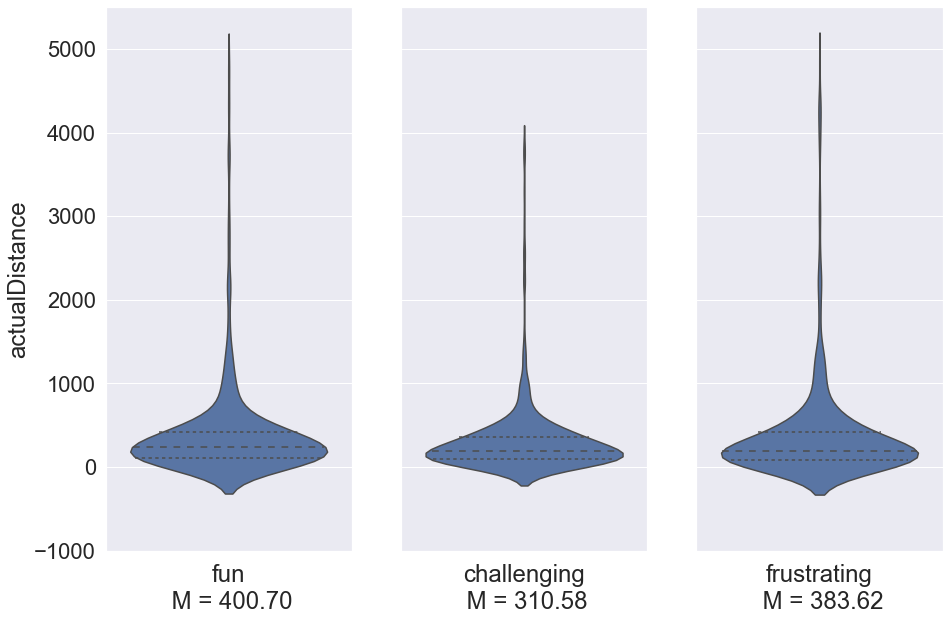

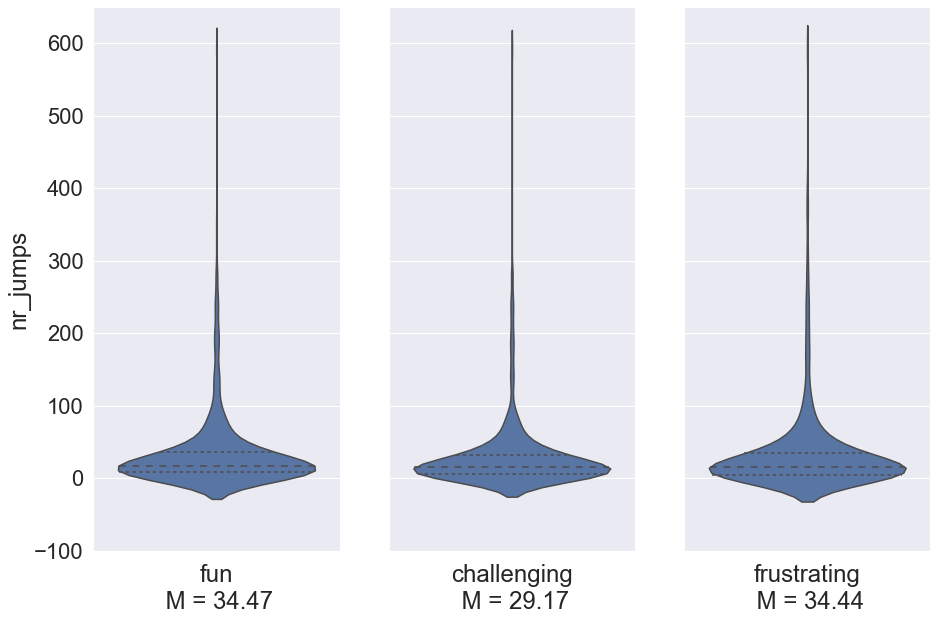

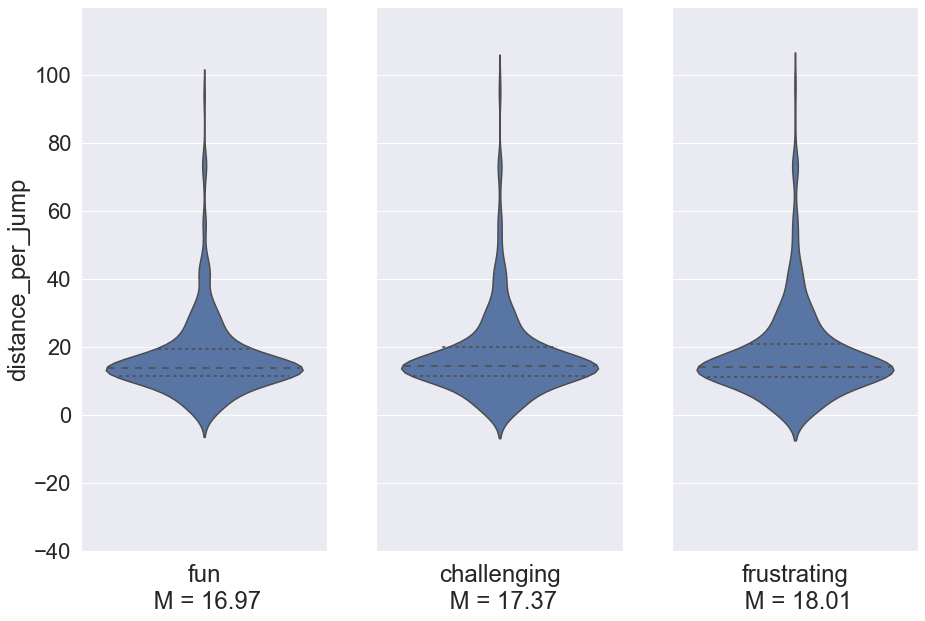

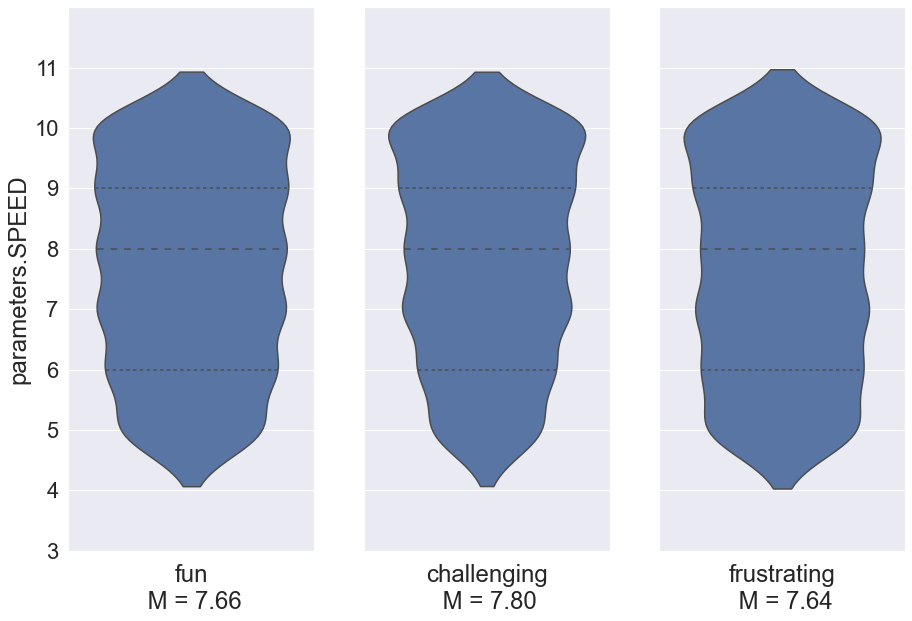

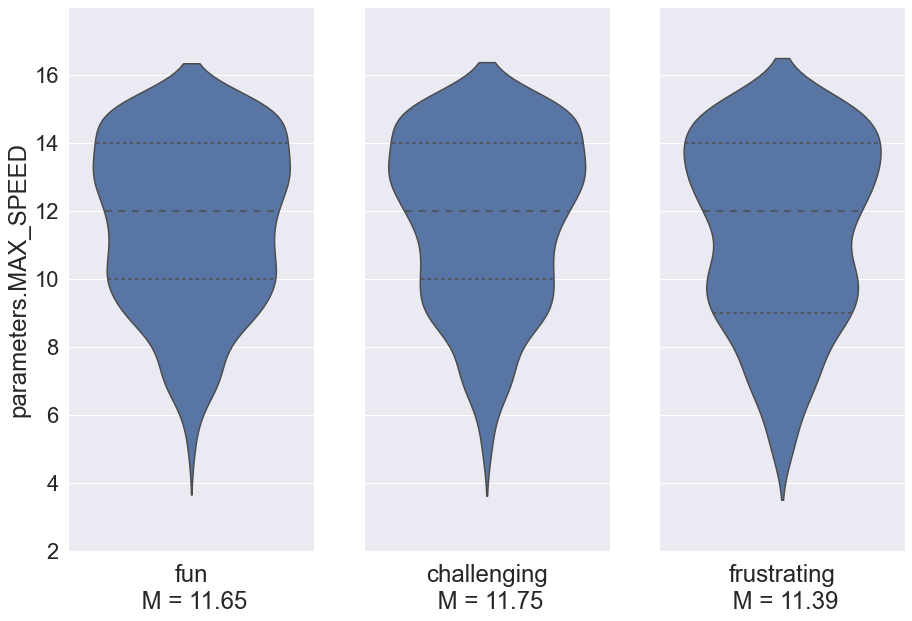

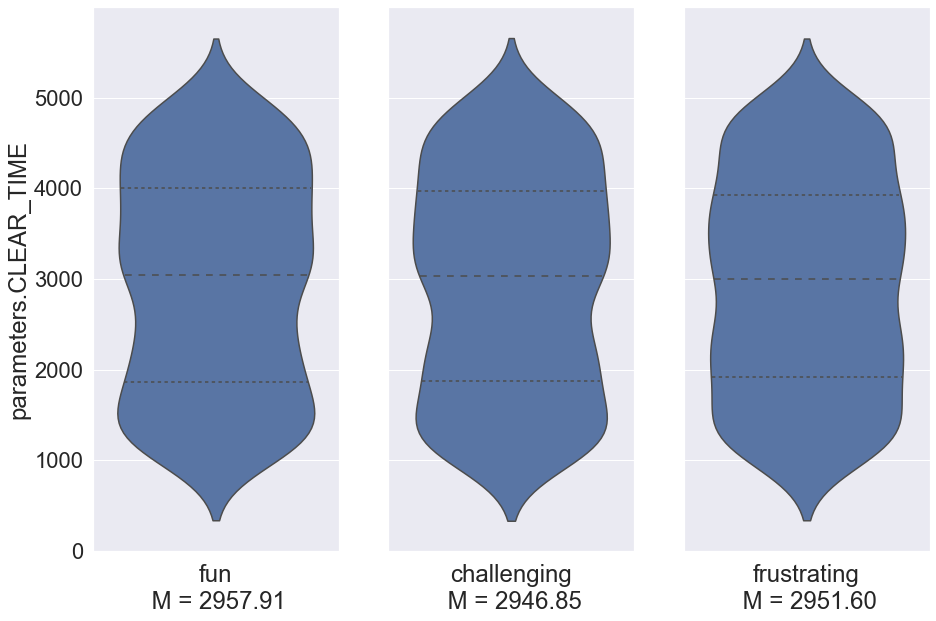

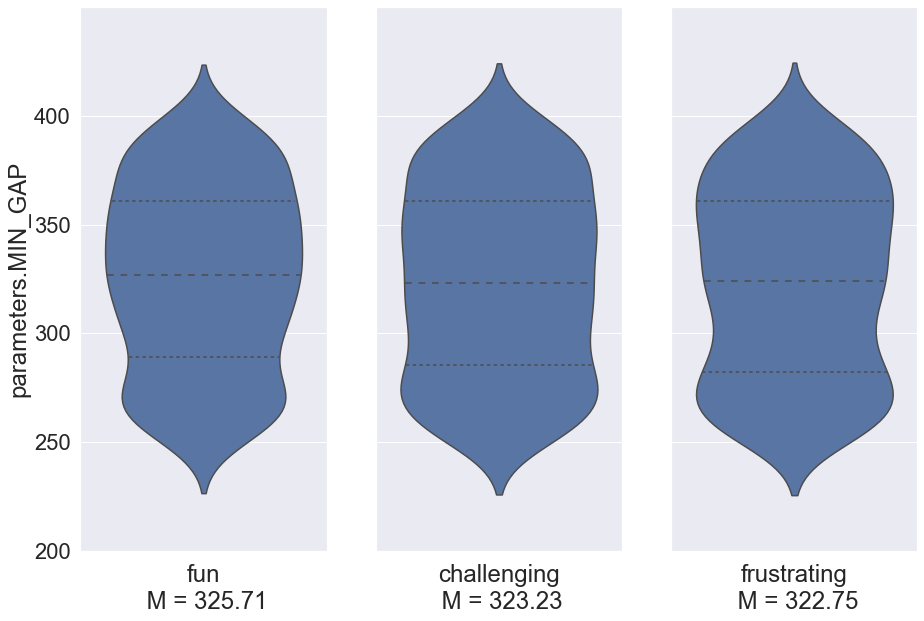

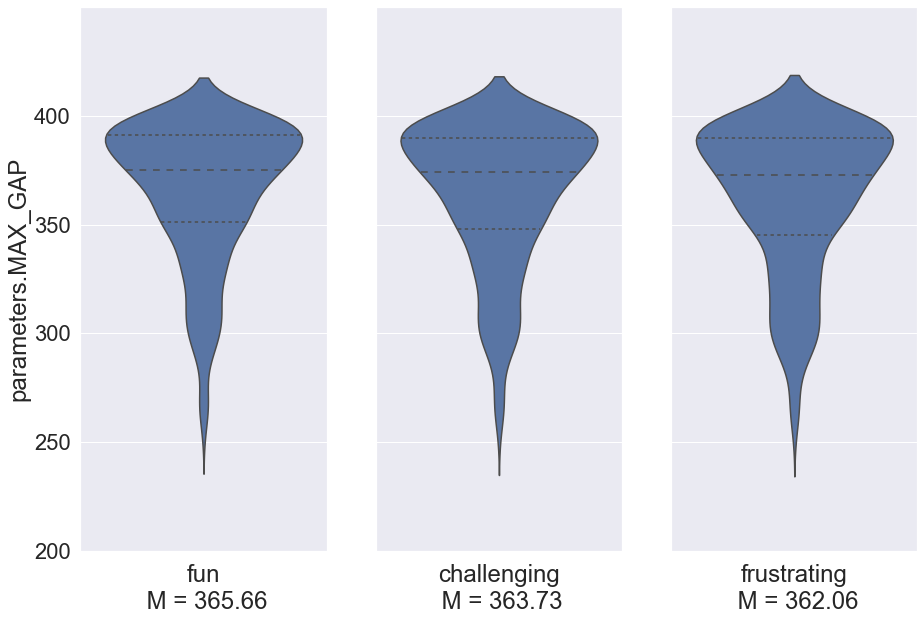

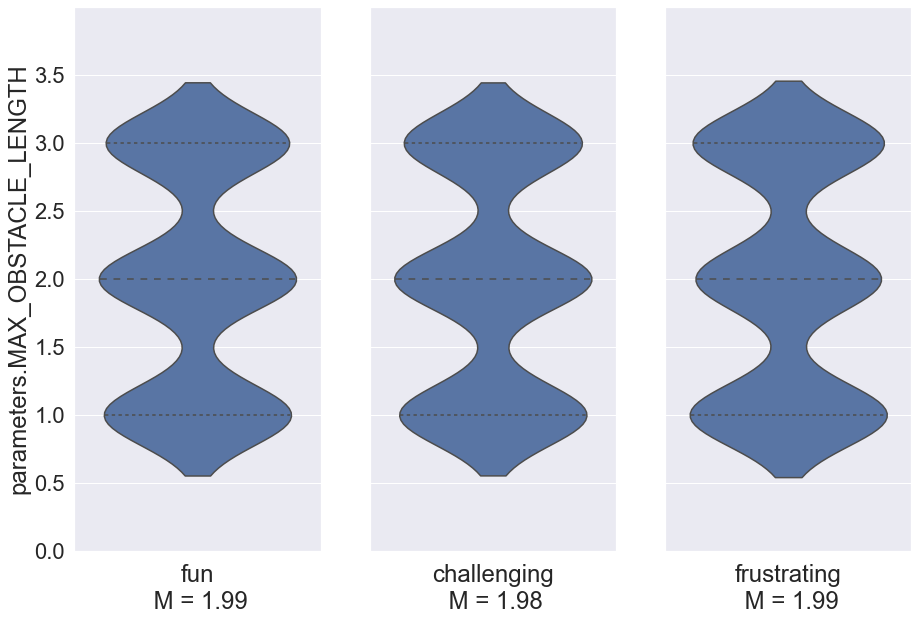

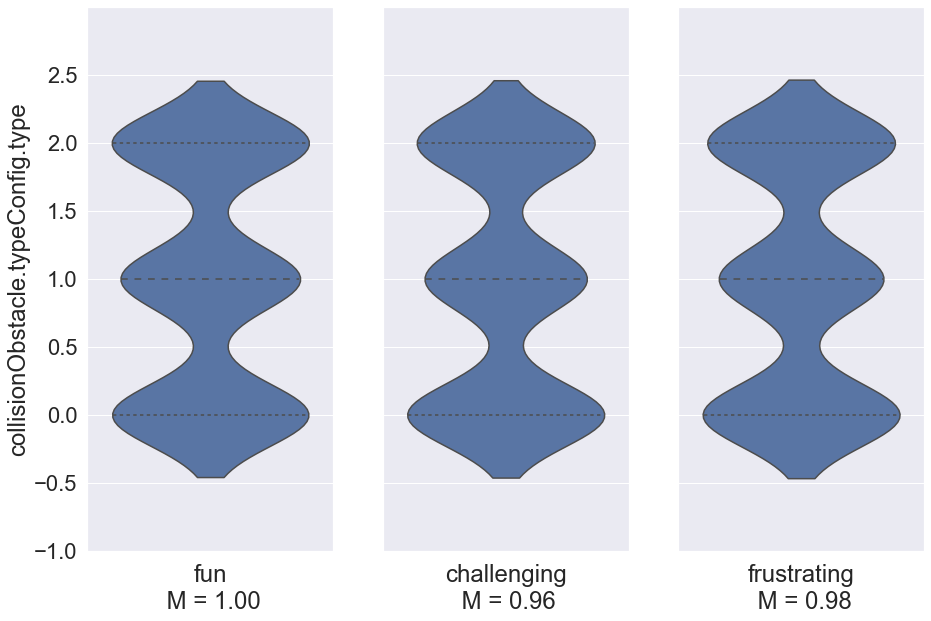

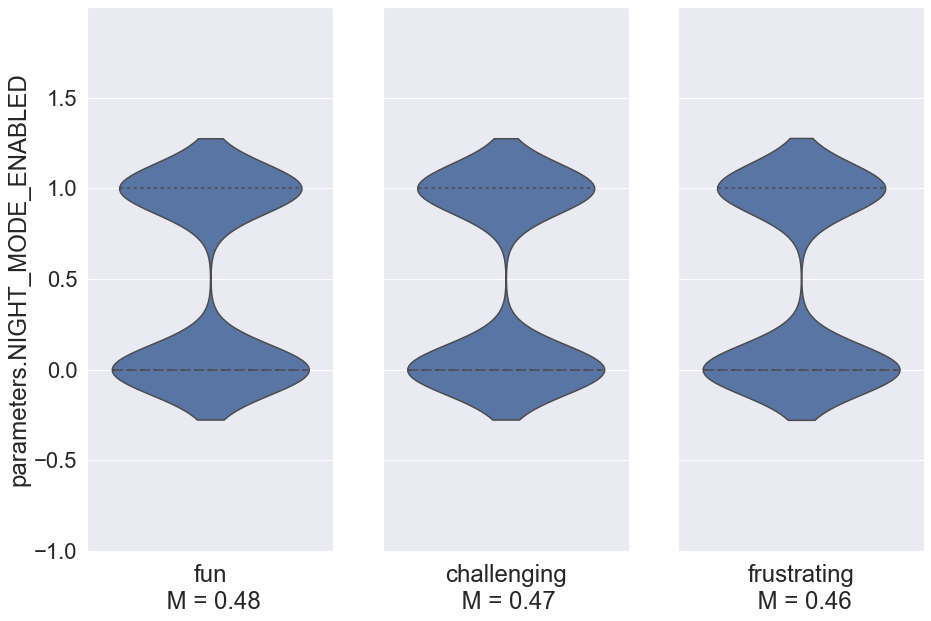

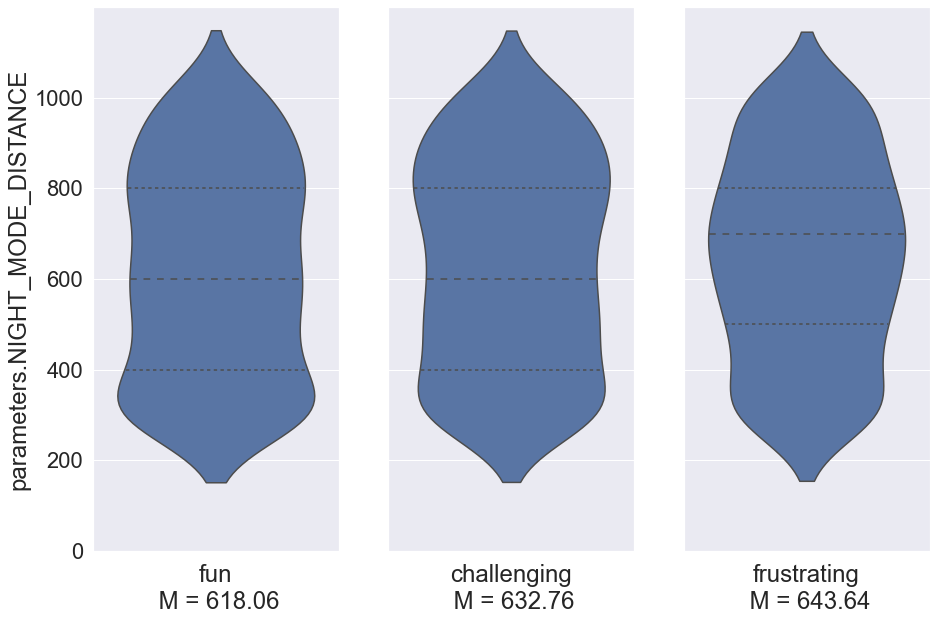

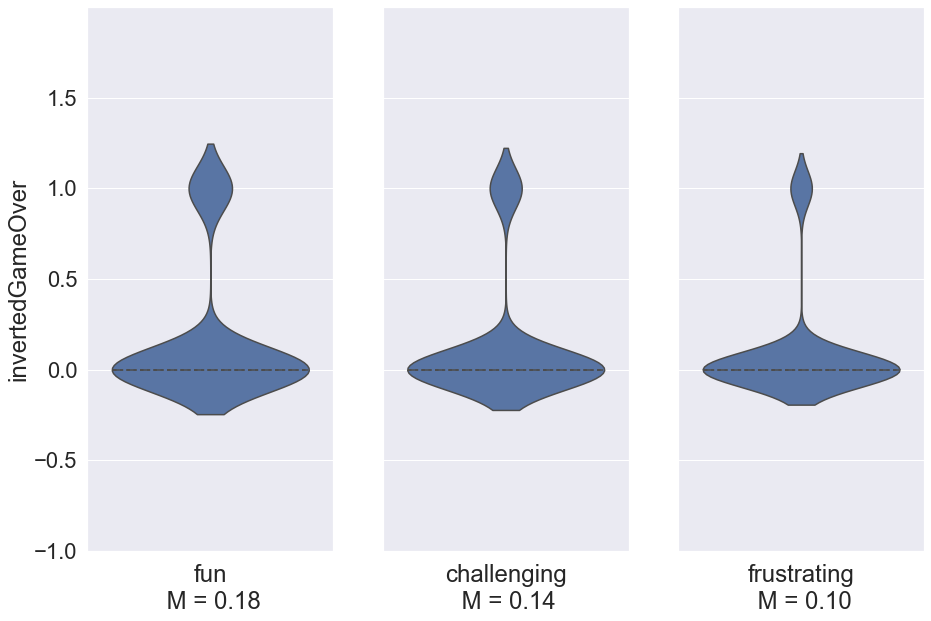

In [24]:

# ----------------------------------------------------------------------------------------------------------------
def explode_positive_counts_of(x): # questionresonses
    a = questionresponses
    a = a.explode(x)
    a['selected'] = np.where(a[x]=='secondlastentry', a['secondlastentry'], a['lastentry'])
    return a[[x, 'selected']]

def append_column_on_selected_id(db, parameter):
    a = db.merge(gameplays, left_on='selected', right_on='_id.$oid')
    return a[[parameter, "selected"]]


# ----------------------------------------------------------------------------------------------------------------

def draw_violin_plot(data, ax, ylabel, xlabel, range_min, range_max, y_ticks, ylabels = True):
    #plt.figure()
    g = sns.violinplot(y=data,  inner="quartile", ax=ax)
    g.set(ylim=(range_min, range_max))
    ax.yaxis.set_ticks(y_ticks)
    if not ylabels:
        ax.yaxis.set_ticklabels([])
    ax.set_ylabel(ylabel, fontsize=24)
    ax.set_xlabel(xlabel, fontsize=24)
    
    
def draw_violin_plots(parameter, range_min, range_max):
    global fig
    
    sns.set(font_scale = 2)
    fig, axs = plt.subplots(ncols=3)
    exploded = explode_positive_counts_of("fun")
    s = append_column_on_selected_id(exploded, parameter)
    ticks = nice_ticks(range_min, range_max, 10)
    draw_violin_plot(
        data = s[parameter], 
        ax = axs[0], 
        y_ticks = ticks,
        xlabel = "fun\n M = %.2f"% (s[parameter].mean()),
        ylabel = parameter,
        range_min = range_min,
        range_max = range_max
    )

    exploded = explode_positive_counts_of("challenging")
    s = append_column_on_selected_id(exploded, parameter)
    draw_violin_plot(
        data = s[parameter], 
        ax = axs[1], 
        y_ticks = ticks,
        ylabels = False,
        xlabel = "challenging\n M = %.2f"% (s[parameter].mean()),
        ylabel = "",
        range_min = range_min,
        range_max = range_max
    )
    
    exploded = explode_positive_counts_of("frustrating")
    s = append_column_on_selected_id(exploded, parameter)
    draw_violin_plot(
        data = s[parameter], 
        ax = axs[2],  
        y_ticks =  ticks,
        ylabels = False,
        xlabel = "frustrating\n M = %.2f"% (s[parameter].mean()),
        ylabel = "",
        range_min = range_min,
        range_max = range_max
    )
        



sns.set(style='white', context='notebook', rc={'figure.figsize':(15,10)})

fig_name = "graphs/notebook/violin_plots/"
draw_violin_plots('actualDistance', -1000, 5500)
plt.savefig(fig_name + 'actualDistance.png')

draw_violin_plots('nr_jumps', -100, 650)
plt.savefig(fig_name + 'nr_jumps.png')

draw_violin_plots('distance_per_jump',-30, 120)
plt.savefig(fig_name + 'distance_per_jump.png')

draw_violin_plots('parameters.SPEED',3, 12)
plt.savefig(fig_name + 'speed.png')

draw_violin_plots('parameters.MAX_SPEED',3, 18)
plt.savefig(fig_name + 'max_speed.png')

draw_violin_plots('parameters.CLEAR_TIME',0, 6000)
plt.savefig(fig_name + 'clear_time.png')

draw_violin_plots('parameters.MIN_GAP',200, 450)
plt.savefig(fig_name + 'min_gap.png')

draw_violin_plots('parameters.MAX_GAP',200, 450)
plt.savefig(fig_name + 'max_gap.png')

draw_violin_plots('parameters.MAX_OBSTACLE_LENGTH',0, 4)
plt.savefig(fig_name + 'max_obstacle_length.png')

draw_violin_plots('collisionObstacle.typeConfig.type', -1, 3)
plt.savefig(fig_name + 'collisionObstacle.png')

draw_violin_plots('parameters.NIGHT_MODE_ENABLED',-1, 2)
plt.savefig(fig_name + 'night_mode_enabled.png')

# conditional: night_mode_distance only for games where night_mode_enabled
# ------------------------------------------------------------------------
old_gameplays = gameplays
coll = gameplays.loc[gameplays["parameters.NIGHT_MODE_ENABLED"] == True]
gameplays = coll
draw_violin_plots('parameters.NIGHT_MODE_DISTANCE', 150, 1200)
plt.savefig(fig_name + 'night_mode_distance.png')

draw_violin_plots('invertedGameOver', -1, 2)
plt.savefig(fig_name + 'invertedGameOver.png')

gameplays = old_gameplays
# ------------------------------------------------------------------------

